<h3> Exploring Random Forest Regressor Model </h3>

Dataset related to Tunnel-Boring Machine's cutting shield : X-ray signal to determine Rock Density V/S Rock Density (kg/m^3)

This Notebook will also compare all common regression methods with Random Forest Regressor 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./Datasets/rock_density_xray.csv')

In [44]:
data.sample(10)

,Rebound Signal Strength nHz,Rock Density kg/m3
82,8.793127,2.459172
245,72.170300,2.536454
131,41.108585,1.658182
143,9.630173,2.656490
250,85.308300,2.621238
91,67.783415,2.392828
159,37.894152,1.777213
200,3.619274,2.261214
133,96.033750,2.101842
210,9.094234,2.284167


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [46]:
# changing column names for simplicity
data.columns = ['Signal' , 'Density']

<Axes: xlabel='Signal', ylabel='Density'>

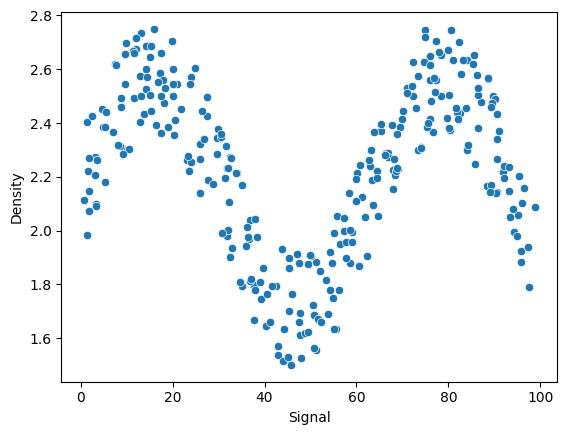

In [47]:

sns.scatterplot(x='Signal' , y='Density' , data=data)

In [48]:
from sklearn.model_selection import train_test_split

X = data['Signal'].values.reshape(-1 , 1)
y = data['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train , y_train)

LinearRegression()

In [50]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
lr_preds = lr_model.predict(X_test)

lr_preds

array([2.20540744, 2.17126847, 2.19771081, 2.20385853, 2.18698458,
       2.20565283, 2.21480579, 2.20363862, 2.17696054, 2.17651189,
       2.21909653, 2.1709636 , 2.23555005, 2.25225024, 2.21368164,
       2.1998536 , 2.17541386, 2.22387233, 2.20123791, 2.24000749,
       2.1851141 , 2.25332257, 2.1839433 , 2.18158837, 2.16970041,
       2.23851224, 2.16848307, 2.27181443, 2.1888658 , 2.17765566,
       2.24609542, 2.19437341, 2.19147953, 2.23518215, 2.26898817,
       2.17594108, 2.25107264, 2.17092383, 2.22167032, 2.19418453,
       2.25748614, 2.22668974, 2.19120694, 2.21006056, 2.17805677,
       2.18522621, 2.2018506 , 2.18033044, 2.2257095 , 2.24435074,
       2.21976196, 2.21308504, 2.23402036, 2.25967621, 2.21425621,
       2.16867831, 2.19545003, 2.21833891, 2.22353349, 2.20486875,
       2.2038698 , 2.24730729, 2.19845409, 2.17820978, 2.27119303,
       2.24703275, 2.27078848, 2.18033391, 2.2448374 , 2.24337184,
       2.17602668, 2.21098843, 2.17740253, 2.24298943, 2.23309

In [51]:
mean_squared_error(y_test , lr_preds)

0.09197625899075706

In [52]:
mean_absolute_error(y_test , lr_preds)

0.2534304465565185

In [53]:
np.sqrt(mean_squared_error(y_test , lr_preds))

0.3032758793421545

In [54]:
# creating a input array for model to test it , something is wrong since model only outputs similar predictions
signal_preds = lr_model.predict(np.arange(0 , 100).reshape(-1 , 1))
signal_preds

array([2.27256115, 2.27149475, 2.27042835, 2.26936195, 2.26829555,
       2.26722915, 2.26616275, 2.26509635, 2.26402995, 2.26296355,
       2.26189715, 2.26083075, 2.25976435, 2.25869795, 2.25763155,
       2.25656515, 2.25549875, 2.25443235, 2.25336595, 2.25229955,
       2.25123315, 2.25016675, 2.24910035, 2.24803395, 2.24696755,
       2.24590115, 2.24483475, 2.24376835, 2.24270195, 2.24163555,
       2.24056915, 2.23950275, 2.23843635, 2.23736995, 2.23630355,
       2.23523715, 2.23417075, 2.23310435, 2.23203795, 2.23097155,
       2.22990515, 2.22883875, 2.22777235, 2.22670595, 2.22563955,
       2.22457315, 2.22350675, 2.22244035, 2.22137395, 2.22030755,
       2.21924115, 2.21817475, 2.21710835, 2.21604195, 2.21497554,
       2.21390914, 2.21284274, 2.21177634, 2.21070994, 2.20964354,
       2.20857714, 2.20751074, 2.20644434, 2.20537794, 2.20431154,
       2.20324514, 2.20217874, 2.20111234, 2.20004594, 2.19897954,
       2.19791314, 2.19684674, 2.19578034, 2.19471394, 2.19364

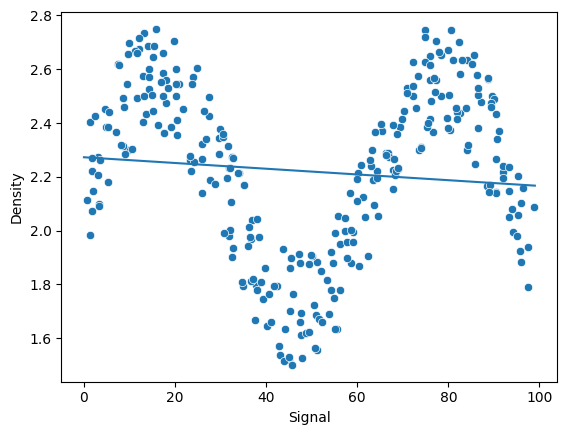

In [55]:
sns.scatterplot(x='Signal' , y='Density' , data=data)
plt.plot(np.arange(0 , 100), signal_preds)

Above scatterplot proves that linear regression doesn't fit to this data even with good metric scores. thus we must always look at the predictions.

In [ ]:
""" This function helps us to run and compare various models with their test sets 
    and plot the regression line in one go without repeating the or newly writting code """
def run_model(model , X_train , y_train , X_test , y_test):

    # Fitting to Training set
    model.fit(X_train , y_train)

    # Getting metrics
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test , preds))
    mae = mean_squared_error(y_test , preds)
    
    print(f'RMSE : {rmse}')
    print(f'MAE : {mae}')

    # plotting results of the model with input as signal range (as a input)
    signal_range = np.arange(0 , 100)
    signal_preds = model.predict(signal_range.reshape(-1 , 1))
    sns.scatterplot(x='Signal' , y='Density' , data=data , color='black')
    plt.plot( signal_range , signal_preds)

RMSE : 0.3032758793421545
MAE : 0.09197625899075706


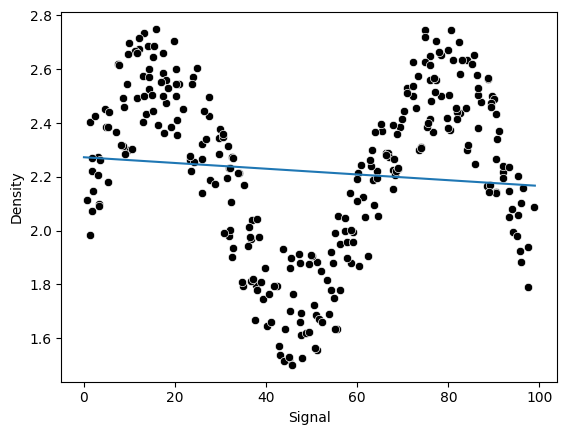

In [57]:
run_model(LinearRegression() , X_train , y_train , X_test , y_test)

Polynomial Regression

In [58]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Using make_pipeline to do all in one go
pipe = make_pipeline(PolynomialFeatures(degree=6) , LinearRegression())

RMSE : 0.13062112812390322
MAE : 0.017061879112361143


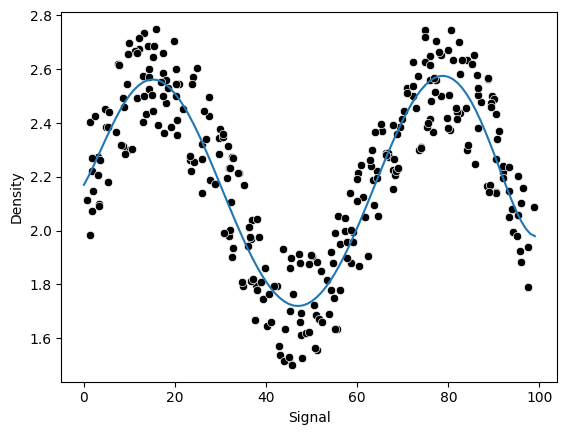

In [59]:
run_model(pipe , X_train , y_train , X_test , y_test)

Polynomial Regression with degree = 6 fits the data very well. But for Signal range out of 100 we need a more robust model.

KNN Regressor

RMSE : 0.15616112969523505
MAE : 0.024386298427692025
RMSE : 0.1470566850600427
MAE : 0.02162566862084859
RMSE : 0.13943979009321675
MAE : 0.019443455061240348
RMSE : 0.15319327800955693
MAE : 0.0234681804273134


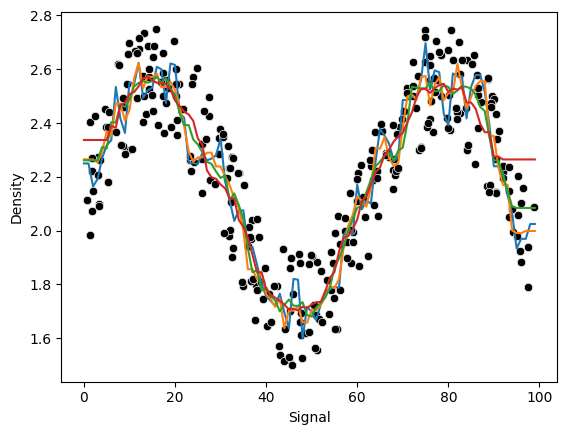

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [3  ,5 , 10 , 20]

for x in k_values:
    run_model(KNeighborsRegressor(n_neighbors=x) , X_train , y_train , X_test , y_test)

KNN Regressor also works well. Lower degree tends to overfitting and higher degree tends to more bias.

Decision Tree Regression

RMSE : 0.19518866264840362
MAE : 0.03809861402647232


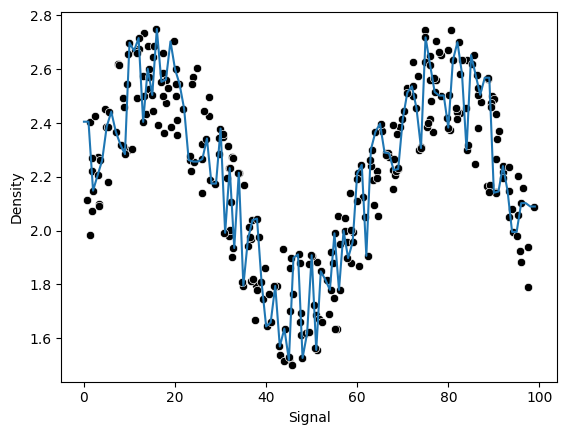

In [61]:
from sklearn.tree import DecisionTreeRegressor

run_model(DecisionTreeRegressor() , X_train , y_train , X_test , y_test)

Decision Trees overfit too much to the noise

Support Vector Regression

RMSE : 0.13100690151044903
MAE : 0.01716280824336849


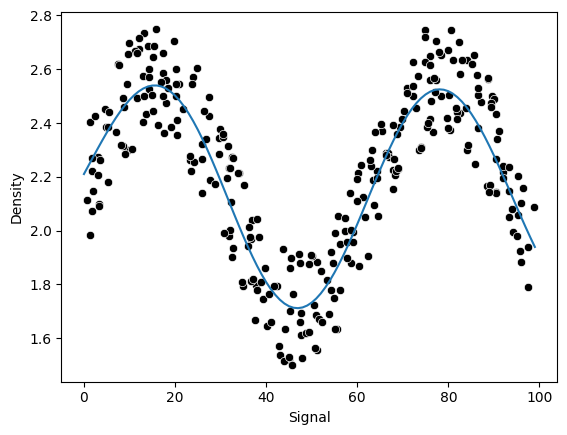

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

params = {
    'C':[0.01 , 0.1 , 1 , 2 , 3],
    'gamma':['auto' , 'scale'],
    'kernel':['linear' , 'rbf']
}

run_model(GridSearchCV(SVR() , param_grid=params) , X_train , y_train , X_test , y_test)

SVR does decent work

Random Forest Regression

RMSE : 0.16846646607373297
MAE : 0.028380950191372226
RMSE : 0.1670325889051499
MAE : 0.027899885756356806
RMSE : 0.16897740935706088
MAE : 0.028553364873023724


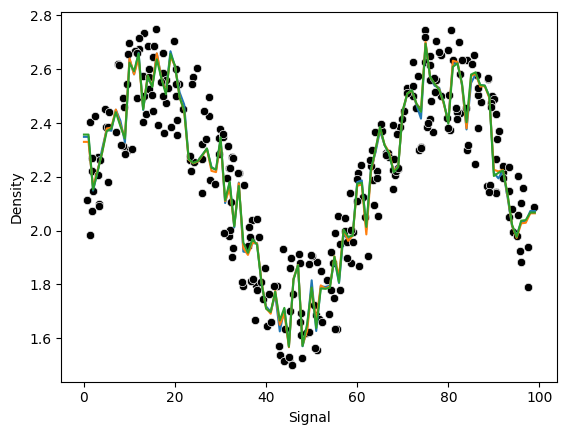

In [63]:
from sklearn.ensemble import RandomForestRegressor

for x in [100 , 150 , 200]:
    run_model(RandomForestRegressor(x) , X_train , y_train , X_test , y_test)

Random Forest picks noise but tires to fit the curve.